<a href="https://colab.research.google.com/github/Anikethb05/Quantum-Computing/blob/main/QFT__Lab_8___FQC___1RVU23CSE056_ipyn_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#!pip install qiskit qiskit-aer pylatexenc

In [16]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
import numpy as np

from matplotlib import pyplot

/tmp/ipython-input-902622100.py:10: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n,do_swaps=False),range(n))


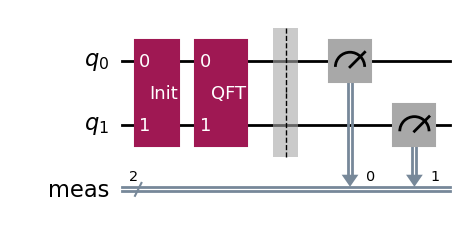

In [17]:
n=2

x = np.array([1,0,-1,0],dtype=complex)
x_norm = x/np.linalg.norm(x)

prep = QuantumCircuit(n,name="Init")
prep.initialize(x_norm,range(n))
qc = QuantumCircuit(n)
qc.append(prep,range(n))
qc.append(QFT(n,do_swaps=False),range(n))
qc.measure_all()
qc.draw('mpl')

In [18]:
sampler = StatevectorSampler()
job = sampler.run([qc],shots=4096)
result = job.result()[0]

In [19]:
counts=result.data.meas.get_counts()

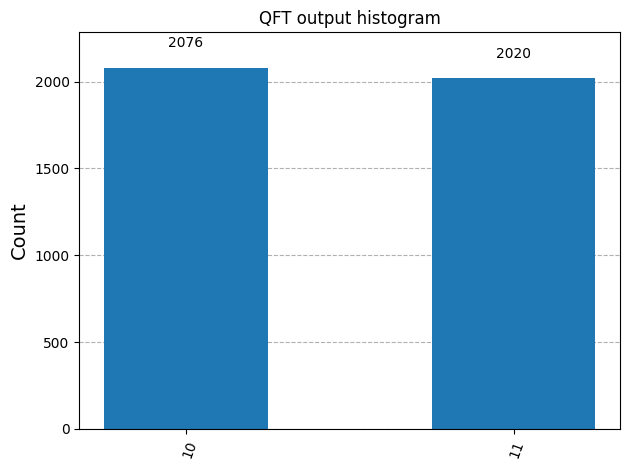

In [20]:
plot_histogram(counts,title="QFT output histogram")
